# Achievement 6.6 - Sourcing & Analyzing Time-Series Data
## This script contains the following:
### 1. Importing your libraries and data
### 2. Subsetting, wrangling, and cleaning time-series data¶
### 3. Time series analysis: decomposition
### 4. Testing for stationarity
### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [47]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [48]:
# importing Data
path = r'/Users/arunibandara/Documents/Achievenemt 6.1'

In [49]:
path

'/Users/arunibandara/Documents/Achievenemt 6.1'

In [50]:
# Import the RenE_c2_wn dataset

df_RE= pd.read_csv(os.path.join(path, '02 Data','prepared_data', 'RenE_c2_wn2.csv'))

In [51]:
df_RE.head (5)

,Country Name,Time,Access_Electracity(%)-Rural_P,Access_Electracity(%)-Urban_P,Access_Electracity(%)-Total_P,RenewableEOutput(gwh),Total_Electracity_output(gwh),RenewableE/TotalE(%),RenewableE_consumption(TJ),Total_final_E_consumption(TFEC),Renewable_E/TFEC(%)
0,Afghanistan,1996,0.0,62.652660,0.010000,475.0,675.0,70.370370,9304.887,24521.55410,37.945748
1,Afghanistan,1997,0.0,64.409889,0.010000,485.0,670.0,72.388060,9861.213,23800.61303,41.432601
2,Afghanistan,1998,0.0,66.160934,0.021977,495.0,665.0,74.436090,10254.290,23255.34464,44.094337
3,Afghanistan,1999,0.0,67.904762,0.179635,505.0,685.0,73.722628,10765.990,20630.12407,52.185774
4,Afghanistan,2000,0.0,69.640984,0.959756,515.7,687.7,74.989094,11301.390,20834.69512,54.243126


In [52]:
df_RE.columns

Index(['Country Name', 'Time', 'Access_Electracity(%)-Rural_P',
       'Access_Electracity(%)-Urban_P', 'Access_Electracity(%)-Total_P',
       'RenewableEOutput(gwh)', 'Total_Electracity_output(gwh)',
       'RenewableE/TotalE(%)', 'RenewableE_consumption(TJ)',
       'Total_final_E_consumption(TFEC)', 'Renewable_E/TFEC(%)'],
      dtype='object')

In [53]:
df_RE.dtypes

Country Name                        object
Time                                 int64
Access_Electracity(%)-Rural_P      float64
Access_Electracity(%)-Urban_P      float64
Access_Electracity(%)-Total_P      float64
RenewableEOutput(gwh)              float64
Total_Electracity_output(gwh)      float64
RenewableE/TotalE(%)               float64
RenewableE_consumption(TJ)         float64
Total_final_E_consumption(TFEC)    float64
Renewable_E/TFEC(%)                float64
dtype: object

In [54]:
# Create a subset  from the data.

df_RE_sub=df_RE
df_RE_sub=df_RE.iloc[:,[1,4]]

In [55]:
df_RE_N= df_RE_sub.groupby(by=['Time']).sum().reset_index()

In [56]:
df_RE_N.shape

(21, 2)

In [57]:
type(df_RE_N)

pandas.core.frame.DataFrame

In [58]:
df_RE_N.head()

,Time,Access_Electracity(%)-Total_P
0,1996,15130.566466
1,1997,15239.641495
2,1998,15385.322391
3,1999,15521.526607
4,2000,15741.850040


In [59]:
# Set the "Time" column as the index

from datetime import datetime

df_RE_N['Year'] = pd.to_datetime(df_RE_N['Time'], format='%Y') # Create a datetime column from "Date.""
df_RE_N = df_RE_N.set_index('Year') # Set the datetime as the index of the dataframe.
df_RE_N.drop(['Time'], axis=1, inplace=True) # Drop the "Date" column.
df_RE_N.head()

,Access_Electracity(%)-Total_P
Year,
1996-01-01,15130.566466
1997-01-01,15239.641495
1998-01-01,15385.322391
1999-01-01,15521.526607
2000-01-01,15741.850040


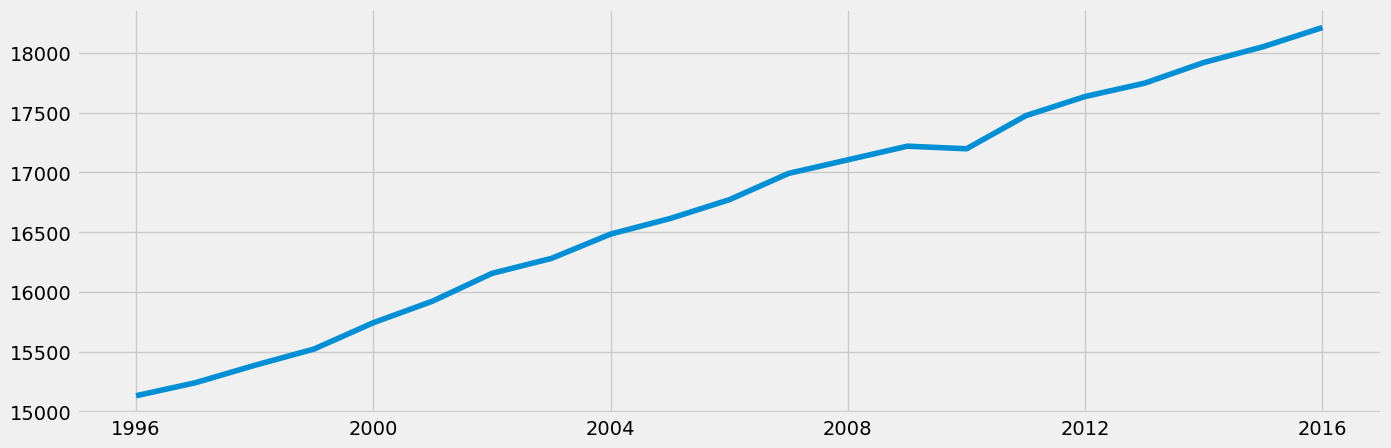

In [60]:
# Plot the new data set

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_RE_N)

In [61]:
# Check for missing values (you shouldn't have any)

df_RE_N.isnull().sum() 

Access_Electracity(%)-Total_P    0
dtype: int64

In [62]:
# Check for duplicates

dups = df_RE_N.duplicated()
dups.sum()

0

In [63]:
# No Missing values!  # No Duplicates !

### 3. Time-series analysis: decomposition

In [64]:
# Decompose the time series using an additive model- lenear decomposition 

decomposition = sm.tsa.seasonal_decompose(df_RE_N, model='additive')

In [65]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

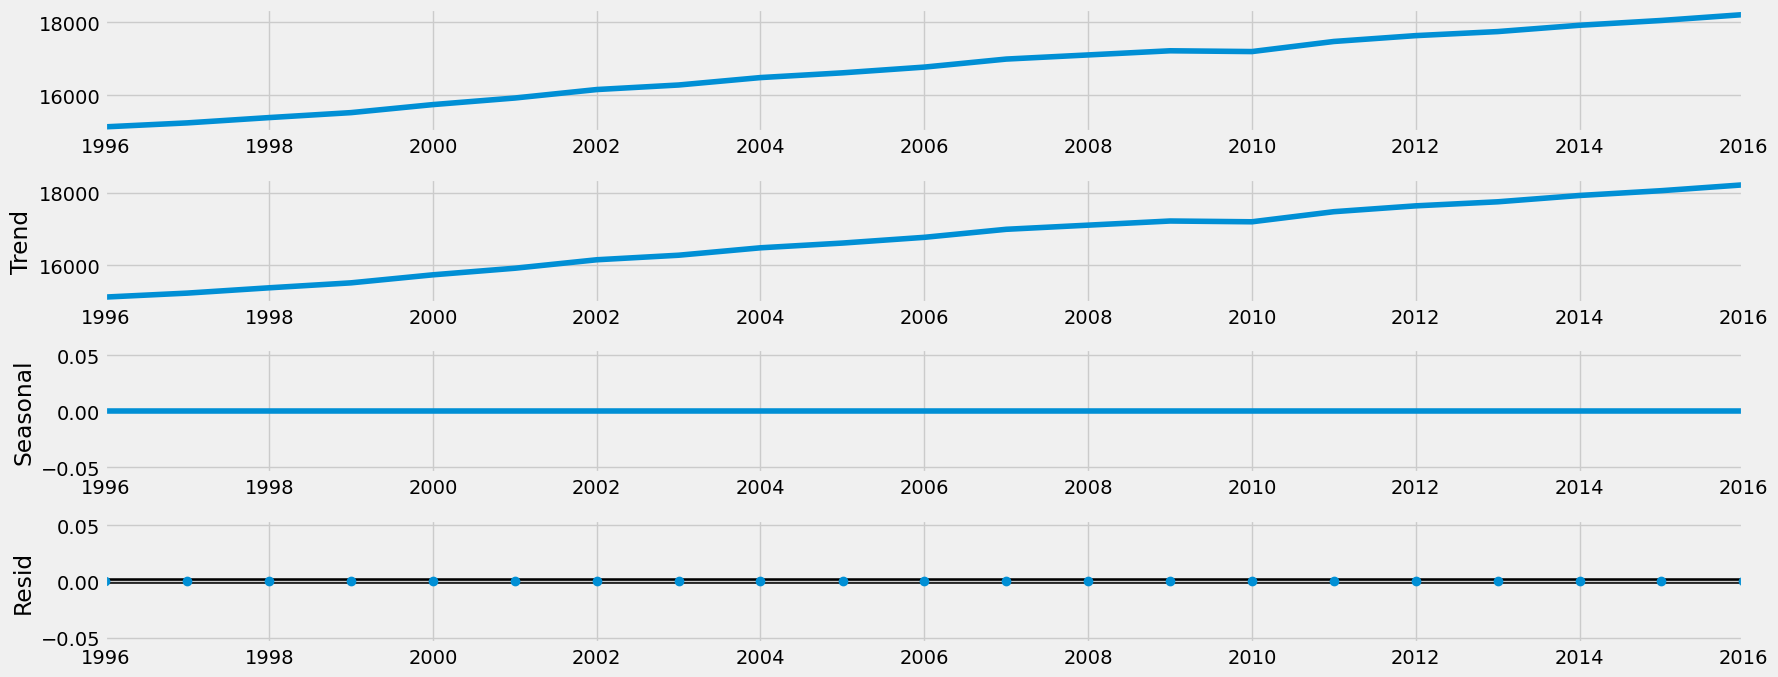

In [66]:
# Plot the separate components

decomposition.plot()
plt.show()

In [72]:
# Carring out non-linear decomposition 

decomposition = sm.tsa.seasonal_decompose(df_RE_N, model='multiplicative')

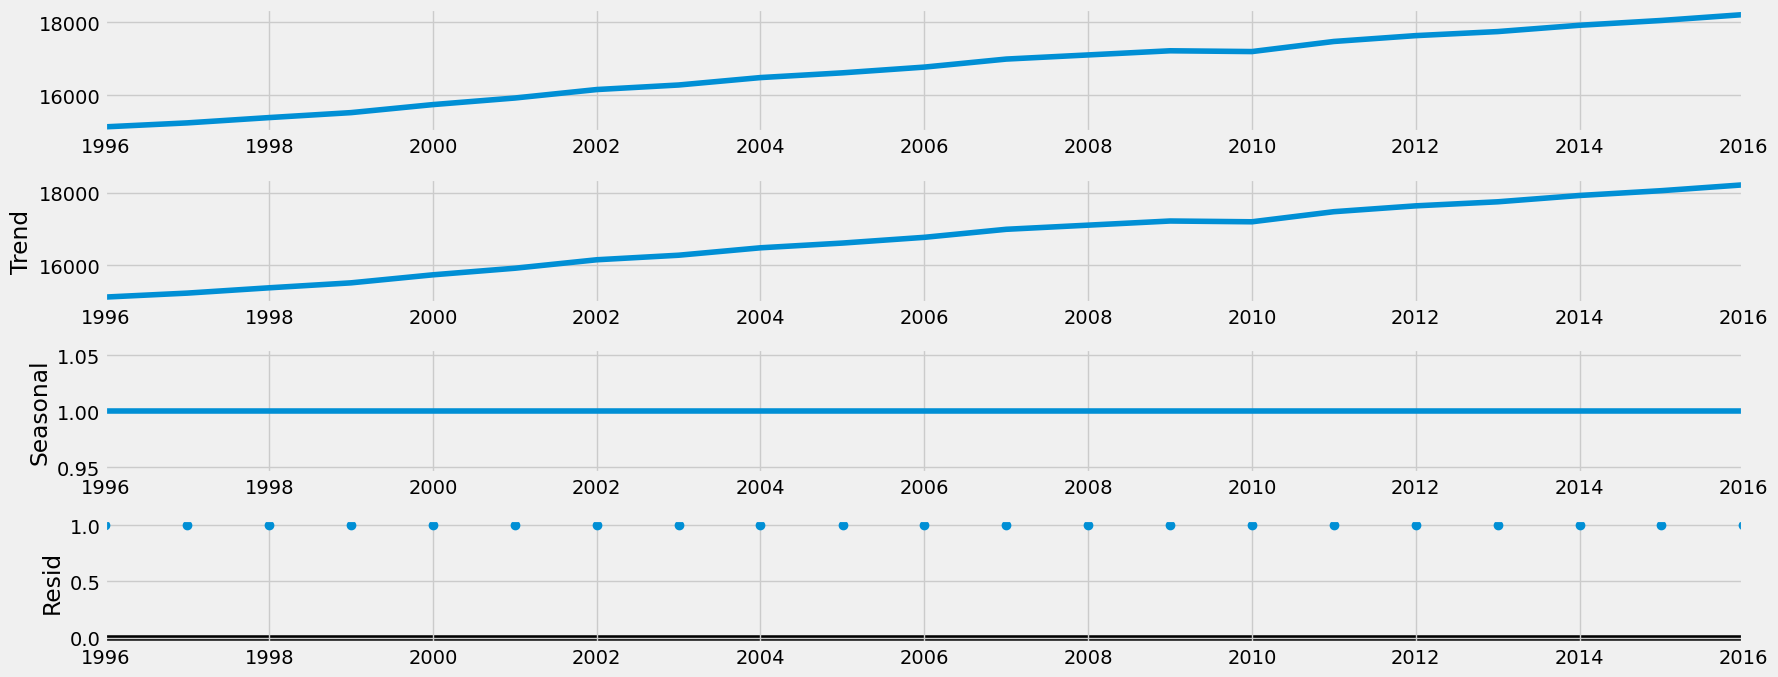

In [73]:
decomposition.plot()
plt.show()

#### No difference in aditive and multiplicative model also no seasonality 

### 4. Testing for stationarity

In [70]:
# appling adfuller() 
from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(df_RE_N['Access_Electracity(%)-Total_P'])

Dickey-Fuller Stationarity test:
Test Statistic                  0.767955
p-value                         0.991101
Number of Lags Used             8.000000
Number of Observations Used    12.000000
Critical Value (1%)            -4.137829
Critical Value (5%)            -3.154972
Critical Value (10%)           -2.714477
dtype: float64


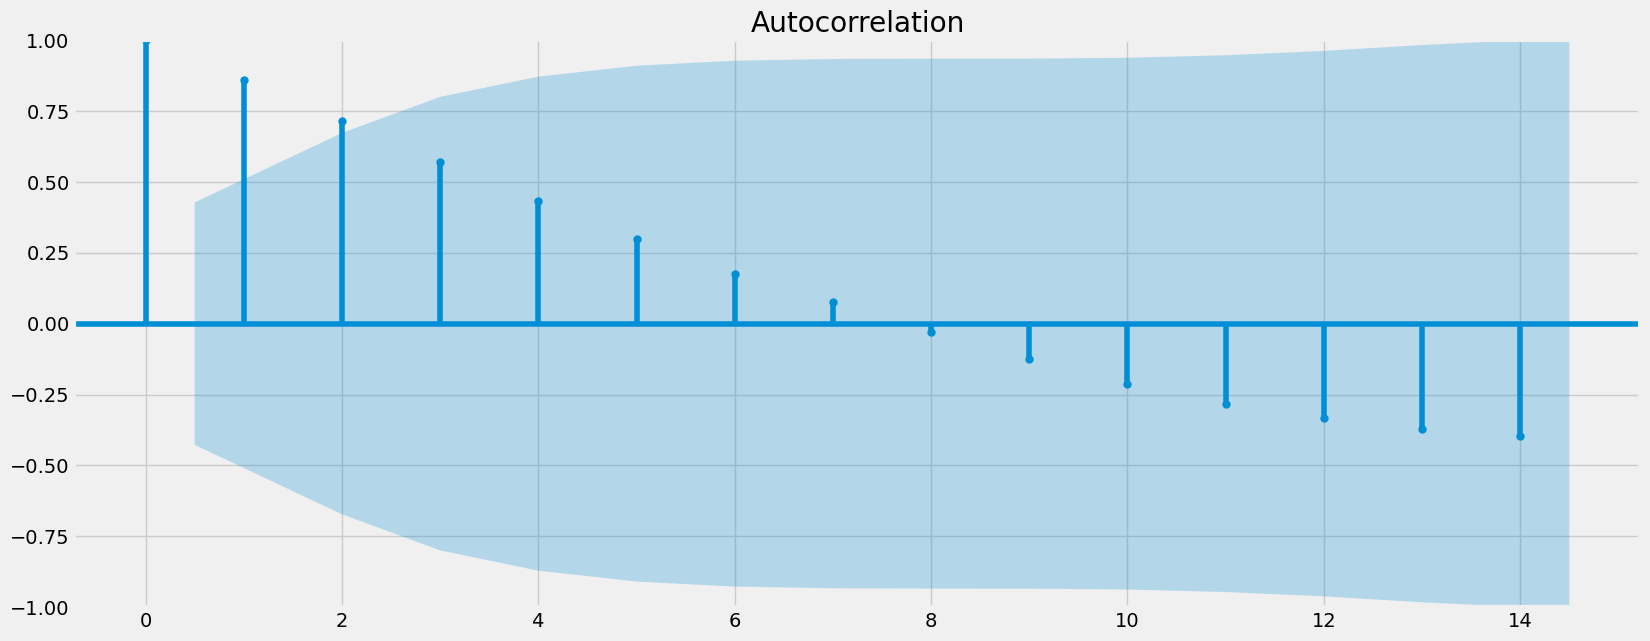

In [71]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_RE_N)
plt.show()

In [75]:
# Test statistics(0.767955) > Critical value(-3.154972) Can't reject null hypothesis 
# Weak stationarity appears with autocorrelation . so will try for stationarizing by differencing.


### 5. Stationarizing the Federal Reserve Economic Data

In [78]:
df_RE_N_diff = df_RE_N - df_RE_N.shift(1) # The df.shift(1) function turns the observation to t-1, making the whole thing t - (t -1)

In [79]:
df_RE_N_diff.dropna(inplace = True) # Here, you remove the missing values that came about as a result of the differencing. 
# You need to remove these or you won't be able to run the Dickey-Fuller test.

In [81]:
df_RE_N_diff.head()

,Access_Electracity(%)-Total_P
Year,
1997-01-01,109.075029
1998-01-01,145.680896
1999-01-01,136.204215
2000-01-01,220.323433
2001-01-01,181.366712


In [82]:
df_RE_N_diff.columns

Index(['Access_Electracity(%)-Total_P'], dtype='object')

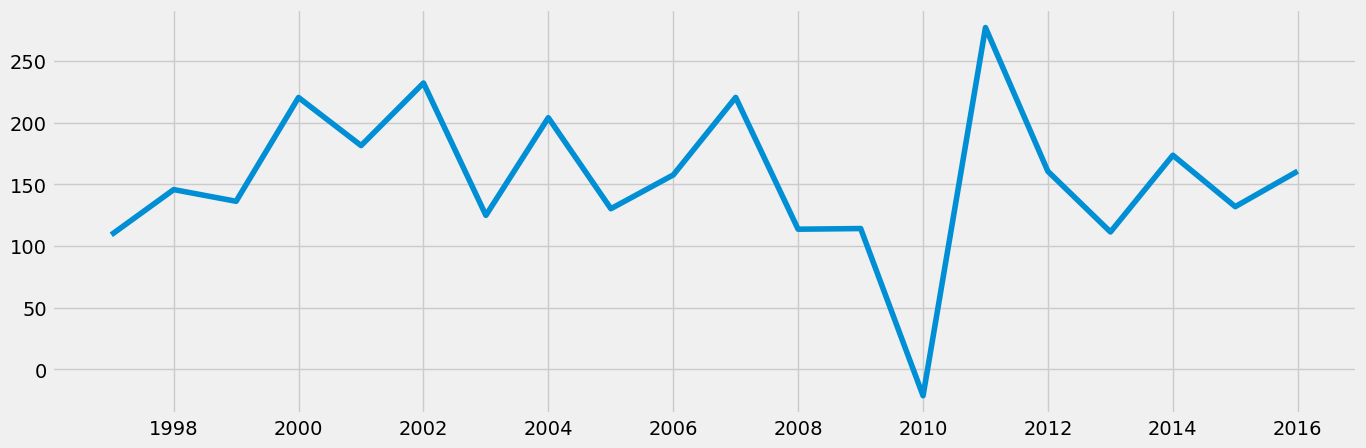

In [83]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(df_RE_N_diff)

In [85]:
dickey_fuller(df_RE_N_diff)

Dickey-Fuller Stationarity test:
Test Statistic                -1.618444e+01
p-value                        4.233363e-29
Number of Lags Used            8.000000e+00
Number of Observations Used    1.100000e+01
Critical Value (1%)           -4.223238e+00
Critical Value (5%)           -3.189369e+00
Critical Value (10%)          -2.729839e+00
dtype: float64


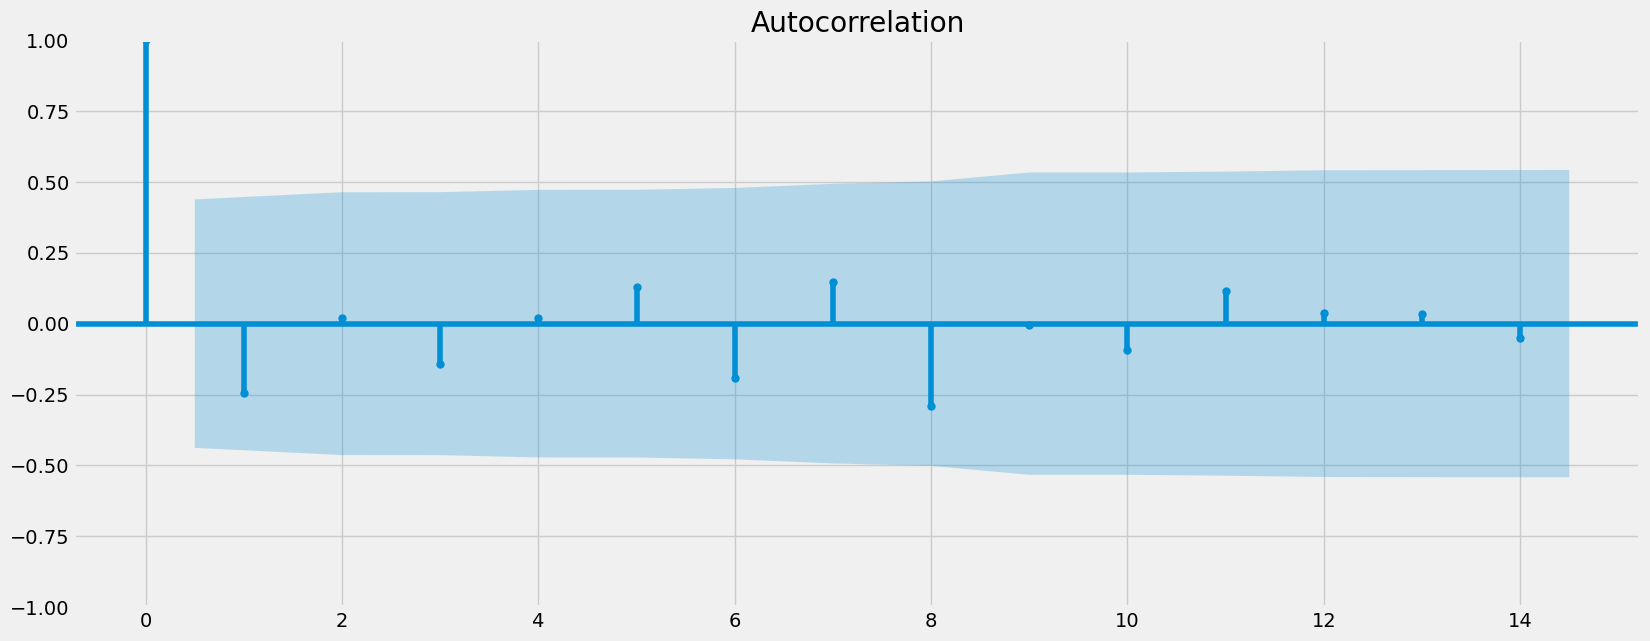

In [86]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(df_RE_N_diff)
plt.show()

#### Test statistics(-16.18444) < Critical value(-4.223238) So we can reject null hypothesis 
#### Weak stationarity appears with autocorrelation.
#### So we can suggest that the data is stationary even though it is weak. 
#### Further differentiation can be conducted if necessary till both criteria are met, since it is fulfilling the first criterion we  can 
#### accepted as rejected null hypothesis and data can be forecasted. 
